# Practice: Multiple Linear Regression - Predicting Late Arrivals #

## By Lorenz Madarang ##

## Data: http://stat-computing.org/dataexpo/2009/the-data.html ##

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from string import punctuation
from collections import Counter
import operator
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

### Upload of Data and Cleaning of Data ###
I uploaded only the flight data from 2008.  I focused only on flights that occurred, so I removed all data from flights that were cancelled.  Also, I removed the columns "Cancelled", "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", and "LateAircraftDelay."  The target I wanted to predict was the "ArrDelay."  I used a multiple linear regression model for this data.  Because I chose a MLR model I only chose features that were continuous features: "ActualElapsedTime", "CRSEElapsedTime", "DepDelay", "Distance", "TaxiIn", and "TaxiOut."  Also, I removed all data that had any Nulls in their columns.  

In [48]:
flightdata = pd.read_csv("flightdata2008.csv")

In [49]:
flightdata.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.000,1955,2211.000,2225,WN,335,...,4.000,8.000,0,NaN,0,nan,nan,nan,nan,nan
1,2008,1,3,4,754.000,735,1002.000,1000,WN,3231,...,5.000,10.000,0,NaN,0,nan,nan,nan,nan,nan
2,2008,1,3,4,628.000,620,804.000,750,WN,448,...,3.000,17.000,0,NaN,0,nan,nan,nan,nan,nan
3,2008,1,3,4,926.000,930,1054.000,1100,WN,1746,...,3.000,7.000,0,NaN,0,nan,nan,nan,nan,nan
4,2008,1,3,4,1829.000,1755,1959.000,1925,WN,3920,...,3.000,10.000,0,NaN,0,2.000,0.000,0.000,0.000,32.000


In [50]:
flightdata.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [51]:
flightcont = flightdata[(flightdata['Cancelled'] == 0)]

In [52]:
flightcont = flightcont[['ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']]

In [53]:
flightcont.head()

,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
0,128.000,150.000,-14.000,8.000,810,4.000,8.000
1,128.000,145.000,2.000,19.000,810,5.000,10.000
2,96.000,90.000,14.000,8.000,515,3.000,17.000
3,88.000,90.000,-6.000,-4.000,515,3.000,7.000
4,90.000,90.000,34.000,34.000,515,3.000,10.000


In [54]:
flightcont = flightcont.dropna()

In [55]:
flightcont.head()

,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
0,128.000,150.000,-14.000,8.000,810,4.000,8.000
1,128.000,145.000,2.000,19.000,810,5.000,10.000
2,96.000,90.000,14.000,8.000,515,3.000,17.000
3,88.000,90.000,-6.000,-4.000,515,3.000,7.000
4,90.000,90.000,34.000,34.000,515,3.000,10.000


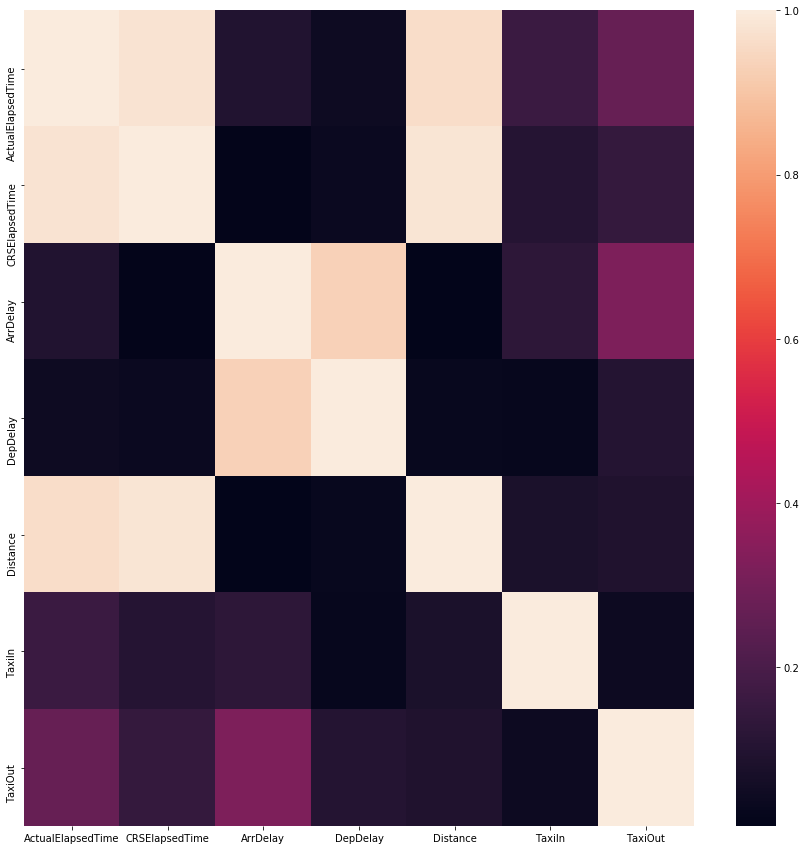

In [56]:
plt.subplots(figsize=(15,15))
sns.heatmap(flightcont.corr())

In [57]:
Y = flightcont['ArrDelay']

In [58]:
X = flightcont[['ActualElapsedTime', 'CRSElapsedTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']]

In [59]:
print(X.shape)
print(Y.shape)

(6855029, 6)
(6855029,)


### Multiple Linear Regression Model ###
I conducted a multiple linear regression model.  With the continuous variables I chose, the model had a R-squared value of .99.  This is really good.  If we look at the residual counts and the Residual vs. Predicted plot it shows that the model is very accurate.  Furthur evaulation of the model shows that the most significant features are "ActualElapsedTime", "CRSElapsedTime", and "DepDelay".  The other features have p-values that are insignificant.  When I create a multiple linear regression model with those only three models, the R-squared value is pretty much the same.  I evaluate the model furthur using a train/test split of 80-20.  The R-squared is pretty much the same in the training set as it is in the test set.  Also, with a cross-validation of 10 folds, the R-squared is pretty much the same again.  

In [60]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  1.00000014e+00  -1.00000002e+00   1.00000006e+00  -9.57584844e-09
   6.87693284e-08  -2.28608202e-08]

Intercept: 
 -1.07791804194e-05

R-squared:
0.999999996753


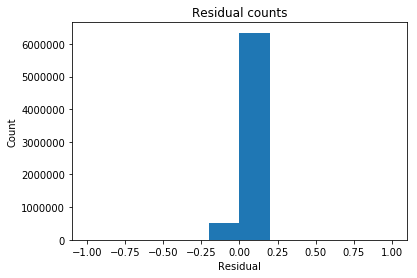

In [62]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This doesn't look bad.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

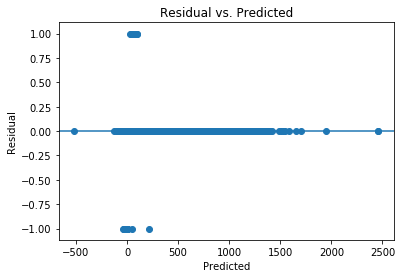

In [63]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Looks pretty good

In [64]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [65]:
X.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'DepDelay', 'Distance', 'TaxiIn',
       'TaxiOut'],
      dtype='object')

In [67]:
linear_formula = 'ArrDelay ~ ActualElapsedTime + CRSElapsedTime + DepDelay + Distance + TaxiIn + TaxiOut'

In [70]:
lm = smf.ols(formula=linear_formula, data=flightcont).fit()

In [71]:
lm.params

Intercept           -0.000
ActualElapsedTime    1.000
CRSElapsedTime      -1.000
DepDelay             1.000
Distance            -0.000
TaxiIn               0.000
TaxiOut             -0.000
dtype: float64

In [72]:
lm.pvalues

Intercept           0.001
ActualElapsedTime   0.000
CRSElapsedTime      0.000
DepDelay            0.000
Distance            0.295
TaxiIn              0.716
TaxiOut             0.838
dtype: float64

In [73]:
lm.rsquared

0.99999999675258699

In [74]:
linear_formula = 'ArrDelay ~ ActualElapsedTime + CRSElapsedTime + DepDelay'

In [75]:
lm = smf.ols(formula=linear_formula, data=flightcont).fit()

In [76]:
lm.params

Intercept           -0.000
ActualElapsedTime    1.000
CRSElapsedTime      -1.000
DepDelay             1.000
dtype: float64

In [77]:
lm.pvalues

Intercept           0.000
ActualElapsedTime   0.000
CRSElapsedTime      0.000
DepDelay            0.000
dtype: float64

In [78]:
lm.rsquared

0.99999999675258622

In [79]:
regr = linear_model.LinearRegression()
Y = flightcont['ArrDelay'].values.reshape(-1, 1)
X = flightcont[['ActualElapsedTime','CRSElapsedTime','DepDelay']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.00000013 -1.00000009  1.00000006]]

Intercept: 
 [ -7.82452948e-06]

R-squared:
0.999999996753


In [80]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.999999997048
Testing on Sample: 0.999999996753


In [81]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([ 0.99999997,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])